# Expériences sur les différents algorithmes de chiffrement

## Temps d'exécution en fonction de la taille du texte et des clés de tailles aléatoires (de 0 à n)

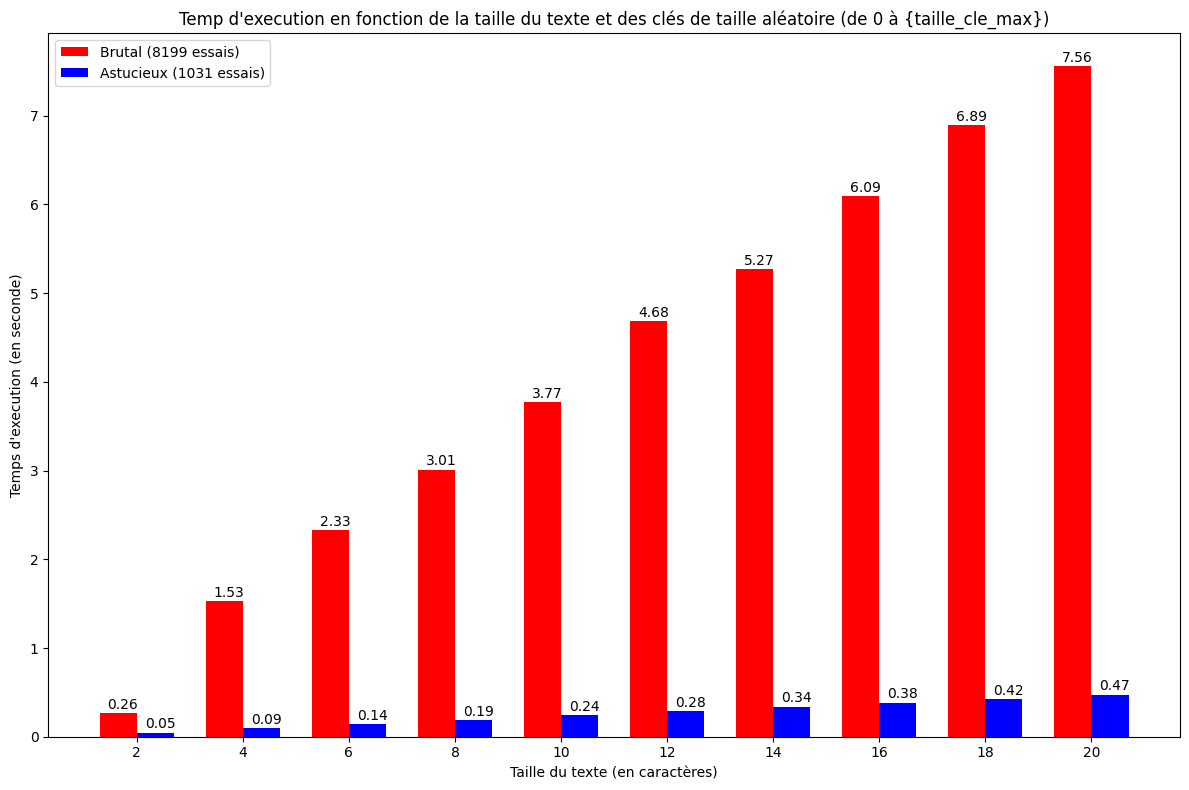

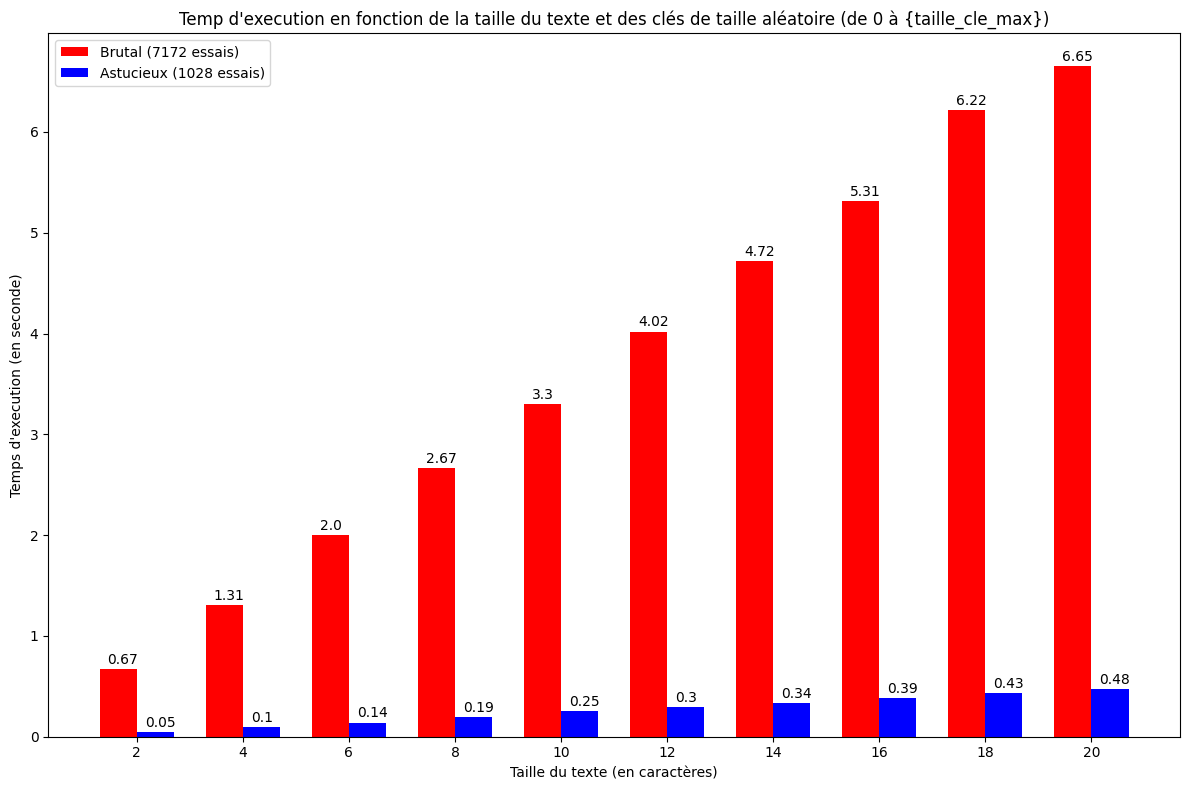

In [10]:
import ipynb.fs.full.SDES as SDES

lettres_persanes = open("data/lettres_persanes.txt", "r").read()
arsene_lupin_extrait = open("data/arsene_lupin_extrait.txt", "r").read()

SDES.graphique_temps_execution_cassages([lettres_persanes[:2], arsene_lupin_extrait[:4], lettres_persanes[:6],
                                    arsene_lupin_extrait[:8], lettres_persanes[:10], arsene_lupin_extrait[:12],
                                    lettres_persanes[:14], arsene_lupin_extrait[:16], lettres_persanes[:18],
                                    arsene_lupin_extrait[:20]], 20)
SDES.graphique_temps_execution_cassages([arsene_lupin_extrait[:2], lettres_persanes[:4], arsene_lupin_extrait[:6],
                                    lettres_persanes[:8], arsene_lupin_extrait[:10], lettres_persanes[:12],
                                    arsene_lupin_extrait[:14], lettres_persanes[:16], arsene_lupin_extrait[:18],
                                    lettres_persanes[:20]], 10)

## Temps de chiffrement/déchiffrement entre RSA et AES

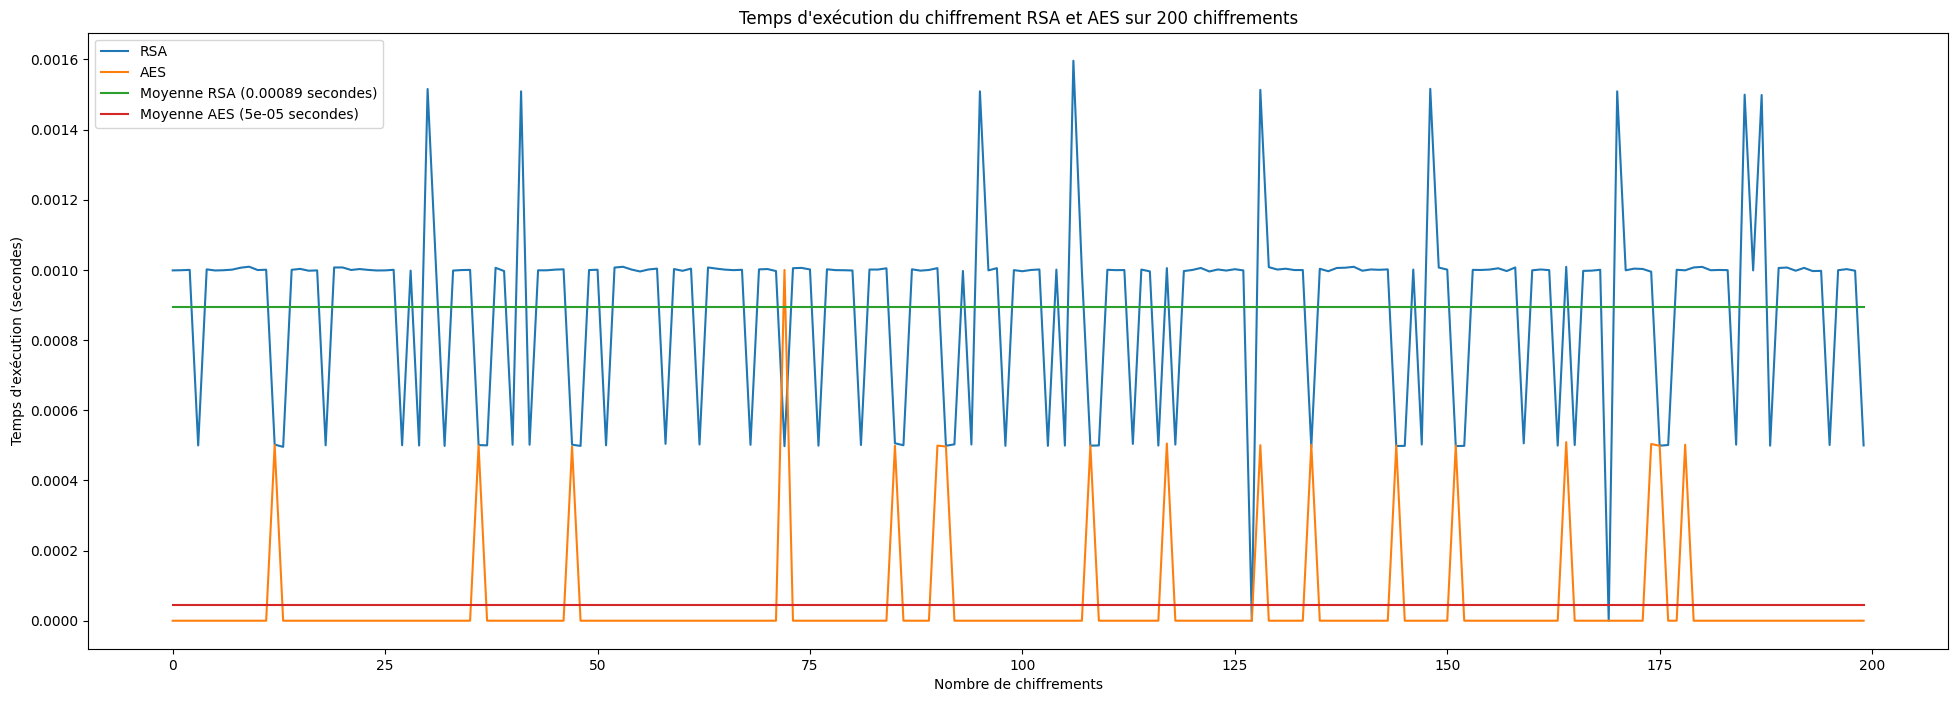

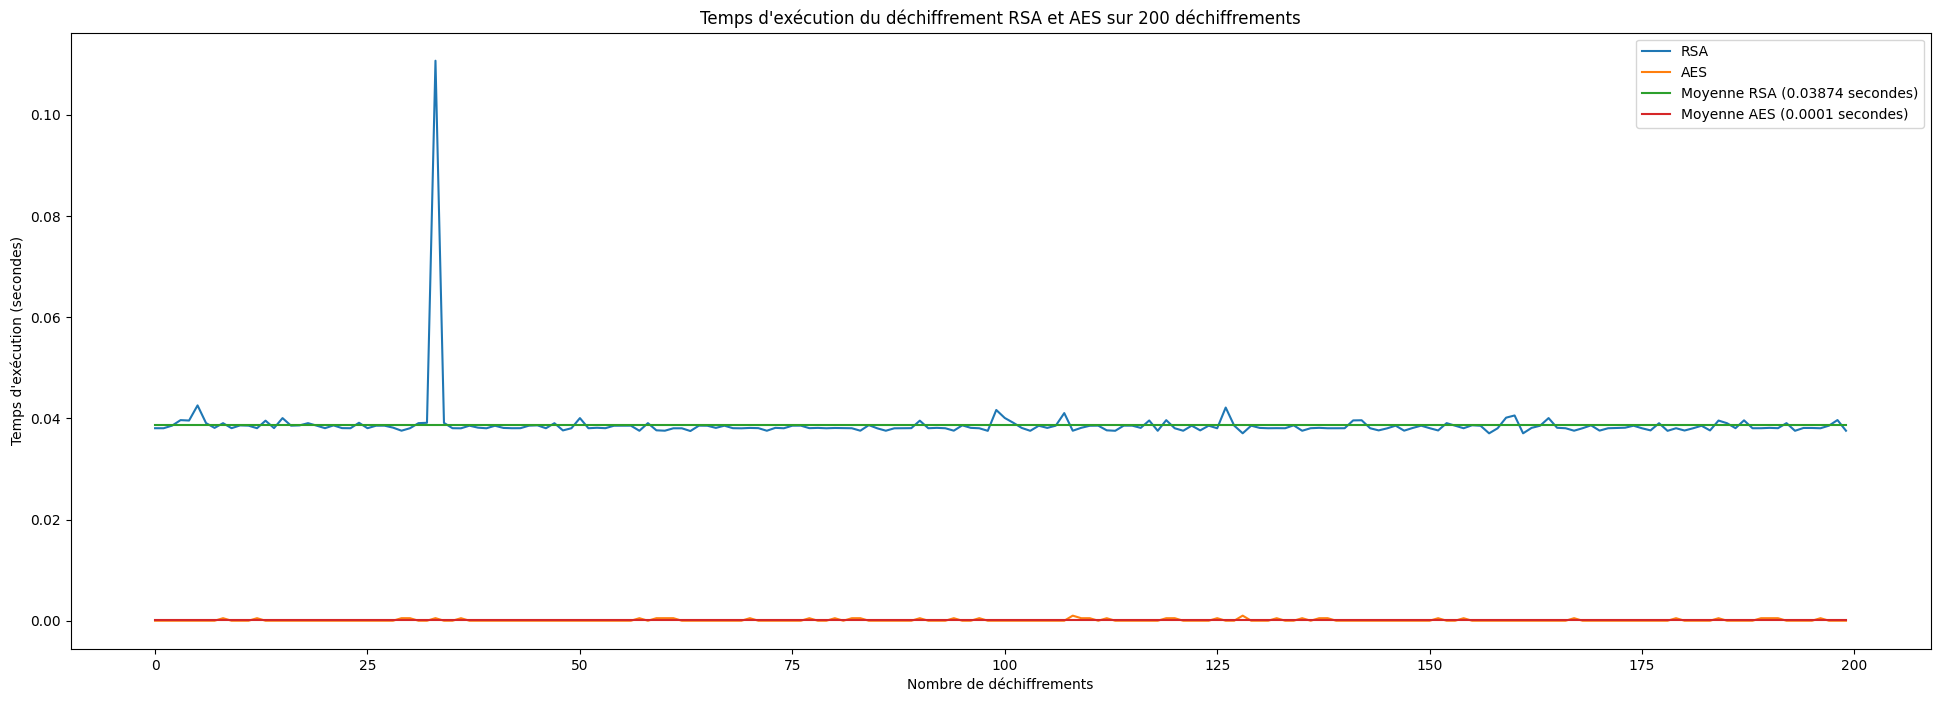

In [62]:
import string
from time import time
import random
import ipynb.fs.full.AES as AES
import ipynb.fs.full.RSA as RSA
import matplotlib.pyplot as plt

def temps_execution(fonction, *args):
    start = time()
    fonction(*args)
    return time() - start

def temps_execution_chiffrement(message, nombre_chiffrements):
    cle_publique, cle_privee = RSA.generer_couple_cles()
    cle_aes = ''.join([str(random.randint(0, 1)) for _ in range(128)])
    cle_aes = int(cle_aes, 2).to_bytes(len(cle_aes) // 8, byteorder='big')
    temps_execution_rsa = []
    temps_execution_aes = []
    for _ in range(nombre_chiffrements):
        temps_execution_rsa.append(temps_execution(RSA.encrypt, message.encode(), cle_publique))
        temps_execution_aes.append(temps_execution(AES.encrypt, cle_aes, message.encode()))
    plt.figure(figsize=(24, 8))
    plt.plot(temps_execution_rsa, label="RSA")
    plt.plot(temps_execution_aes, label="AES")
    moyenne_rsa = sum(temps_execution_rsa) / len(temps_execution_rsa)
    moyenne_aes = sum(temps_execution_aes) / len(temps_execution_aes)
    plt.plot([moyenne_rsa] * len(temps_execution_rsa), label=f'Moyenne RSA ({round(moyenne_rsa, 5)} secondes)')
    plt.plot([moyenne_aes] * len(temps_execution_aes), label=f'Moyenne AES ({round(moyenne_aes, 5)} secondes)')
    plt.title(f'Temps d\'exécution du chiffrement RSA et AES sur {nombre_chiffrements} chiffrements')
    plt.xlabel('Nombre de chiffrements')
    plt.ylabel('Temps d\'exécution (secondes)')
    plt.legend()
    plt.show()

def temps_execution_dechiffrement(message, nombre_chiffrements):
    cle_publique, cle_privee = RSA.generer_couple_cles()
    cle_aes = ''.join([str(random.randint(0, 1)) for _ in range(128)])
    cle_aes = int(cle_aes, 2).to_bytes(len(cle_aes) // 8, byteorder='big')
    temps_execution_rsa = []
    temps_execution_aes = []
    for _ in range(nombre_chiffrements):
        message_chiffre_rsa = RSA.encrypt(message.encode(), cle_publique)
        message_chiffre_aes = AES.encrypt(cle_aes, message.encode())
        temps_execution_rsa.append(temps_execution(RSA.decrypt, message_chiffre_rsa, cle_privee))
        temps_execution_aes.append(temps_execution(AES.decrypt, cle_aes, message_chiffre_aes))
    plt.figure(figsize=(24, 8))
    plt.plot(temps_execution_rsa, label="RSA")
    plt.plot(temps_execution_aes, label="AES")
    moyenne_rsa = sum(temps_execution_rsa) / len(temps_execution_rsa)
    moyenne_aes = sum(temps_execution_aes) / len(temps_execution_aes)
    plt.plot([moyenne_rsa] * len(temps_execution_rsa), label=f'Moyenne RSA ({round(moyenne_rsa, 5)} secondes)')
    plt.plot([moyenne_aes] * len(temps_execution_aes), label=f'Moyenne AES ({round(moyenne_aes, 5)} secondes)')
    plt.title(f'Temps d\'exécution du déchiffrement RSA et AES sur {nombre_chiffrements} déchiffrements')
    plt.xlabel('Nombre de déchiffrements')
    plt.ylabel('Temps d\'exécution (secondes)')
    plt.legend()
    plt.show()

temps_execution_chiffrement(''.join(random.choice(string.ascii_uppercase + string.digits) for _ in range(214)), 200)
temps_execution_dechiffrement(''.join(random.choice(string.ascii_uppercase + string.digits) for _ in range(214)), 200)
